# Miscellaneous Functions for Signals & Models

##### Initialisation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

### Functions related to Models

#### Define a Transfer Function Model

In [2]:
nsys=np.array([1])
dsys=np.array([1,1,2])

In [3]:
sys_tf = sig.TransferFunction(nsys, dsys)
sys_tf

TransferFunctionContinuous(
array([1.]),
array([1., 1., 2.]),
dt: None
)

The Transfer function model can be converted to a zeros-poles-gain model

In [4]:
sys_zpk=sys_tf.to_zpk()
sys_zpk

ZerosPolesGainContinuous(
array([], dtype=float64),
array([-0.5+1.32287566j, -0.5-1.32287566j]),
1.0,
dt: None
)

The poles ofthe system can also be calculated by finding the roots of the denominator polynomial. In Python you only have to supply the coefficients of the polynomial for the calculation of the roots.


In [5]:
psys=np.roots([1,1,2])
psys

array([-0.5+1.32287566j, -0.5-1.32287566j])

Naturally this give the same results as the representation of the transfer function in a zpk-model.
The zero's have to balculated seperately:

In [6]:
zsys=np.roots([1])
zsys

array([], dtype=float64)

The stabilty of the system can be derived from the excistance of positive real parts of the poles.

*For a stable system the real parts of all poles should be smaller than zero*

In [7]:
if np.min(np.real(psys))<0:
    print('The system is stable!')
elif np.min(np.real(psys))==0:
    print('The system is marginally stable!')
else:
    print('The system is unstable!')

The system is stable!


### Gain-Margin and Phase-Margin calculations

These calculations require an extra package in python. Installation can be done via the Conda command promt:
Installation command line command for installation of the control package:
*conda install -c conda-forge control*

The documentation can be found at: 
[Control package for Python](https://python-control.readthedocs.io/en/0.8.2/intro.html)

This package has its own defintions for the various models. The package is more similar to the Matlab commands. 

In [8]:
import control as ctl

In [9]:
k=1
nsys = np.array([k])
dsys = np.array([0.16, 0.285, 1, 1])

In [10]:
tf1b = ctl.tf(nsys,dsys)
tf1b
gm, pm, wg, wp = ctl.margin(tf1b)

In [11]:
gm, pm, wg, wp

(0.7812500000000004,
 -15.563245454184539,
 2.5000000000000004,
 2.6246703234292292)

In [12]:
tf1b


              1
----------------------------
0.16 s^3 + 0.285 s^2 + s + 1

(array([-0.32405069+2.32606878j, -0.32405069-2.32606878j,
        -1.13314862+0.j        ]), array([], dtype=float64))

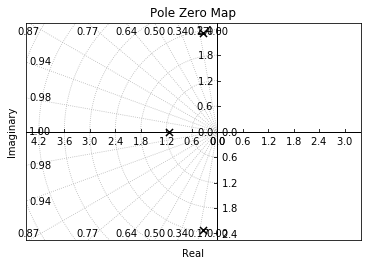

In [13]:
ctl.pzmap(tf1b,Plot=True,grid=True)

(array([[-1.13314862e+00 +0.j        , -3.24050689e-01 -2.32606878j,
         -3.24050689e-01 +2.32606878j],
        [-1.13314862e+00 +0.j        , -3.24050689e-01 -2.32606878j,
         -3.24050689e-01 +2.32606878j],
        [-1.73183049e+00 +0.j        , -2.47097538e-02 -2.48270079j,
         -2.47097538e-02 +2.48270079j],
        [-2.14673651e+00 +0.j        ,  1.82743253e-01 -2.64597962j,
          1.82743253e-01 +2.64597962j],
        [-2.46285085e+00 +0.j        ,  3.40800425e-01 -2.79509147j,
          3.40800425e-01 +2.79509147j],
        [-2.72040682e+00 +0.j        ,  4.69578411e-01 -2.92991207j,
          4.69578411e-01 +2.92991207j],
        [-2.93943913e+00 +0.j        ,  5.79094564e-01 -3.05271616j,
          5.79094564e-01 +3.05271616j],
        [-3.13115310e+00 +0.j        ,  6.74951552e-01 -3.1656269j ,
          6.74951552e-01 +3.1656269j ],
        [-3.30242246e+00 +0.j        ,  7.60586232e-01 -3.27033067j,
          7.60586232e-01 +3.27033067j],
        [-3.4577677

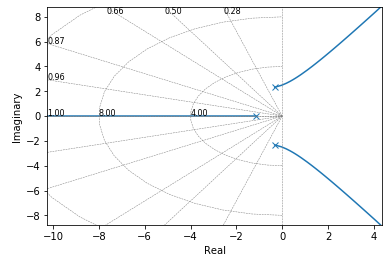

In [14]:
ctl.root_locus(tf1b,grid=True,PrintGain=True)

## Pole placement

Define the poles and zeros

In [15]:
A = np.array([[ 1.380,  -0.2077,  6.715, -5.676  ],
              [-0.5814, -4.290,   0,      0.6750 ],
              [ 1.067,   4.273,  -6.654,  5.893  ],
              [ 0.0480,  4.273,   1.343, -2.104  ]])
B = np.array([[ 0,      5.679 ],
              [ 1.136,  1.136 ],
              [ 0,      0,    ],
              [-3.146,  0     ]])
P = np.array([-0.2, -0.5, -5.0566, -8.6659])

In [16]:
fsf1 = sig.place_poles(A, B, P, method='KNV0')
fsf1.gain_matrix
fsf2 = sig.place_poles(A, B, P)  # uses YT method
fsf2.computed_poles
fsf3 = sig.place_poles(A, B, P, rtol=-1, maxiter=100)
fsf3.X
abs(np.linalg.det(fsf1.X)) < abs(np.linalg.det(fsf2.X)), abs(np.linalg.det(fsf2.X)) < abs(np.linalg.det(fsf3.X))

(True, True)

### New example - pole placement with plot

In [17]:
 A = np.array([[ 0,  7/3.,  0,   0   ],
               [ 0,   0,    0,  7/9. ],
               [0,   0,    0,   0   ],
               [ 0,   0,    0,   0   ]])
B = np.array([[ 0,  0 ],
              [ 0,  0 ],
              [ 1,  0 ],
              [ 0,  1 ]])
P = np.array([-3, -1, -2-1j, -2+1j]) / 3.
fsf = sig.place_poles(A, B, P, method='YT')

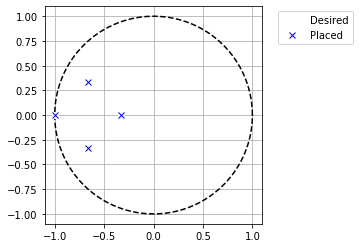

In [18]:
t = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(t), np.sin(t), 'k--')  # unit circle
plt.plot(fsf.requested_poles.real, fsf.requested_poles.imag,'wo', label='Desired')
plt.plot(fsf.computed_poles.real, fsf.computed_poles.imag, 'bx',label='Placed')
plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc='best', numpoints=1)
plt.show()